🔍 Computing embedding for your face...
📸 Scanning dataset in 'all_images' ...


Processing images: 100%|██████████| 180/180 [11:58<00:00,  3.99s/it]



✅ Found 180 valid face embeddings.

🎯 Top Matches:
_DSC0011.jpg: similarity = 0.570
_DSC3048.jpg: similarity = 0.554
_DSC0527.jpg: similarity = 0.477
_DSC5966.jpg: similarity = 0.468
_DSC0041.jpg: similarity = 0.451


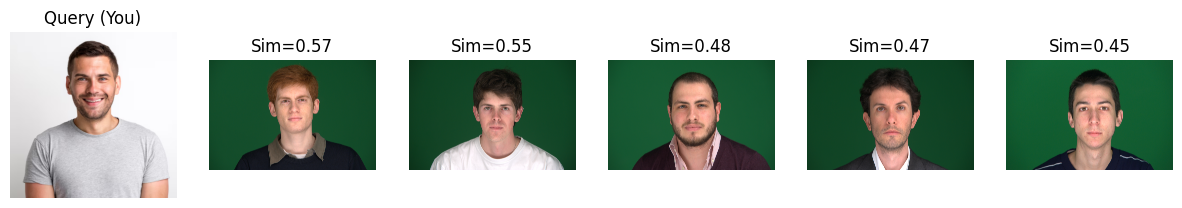

In [2]:
# Step 1: Imports
from deepface import DeepFace
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os

# Step 2: Configuration
# ---------------------------------------------------
dataset_dir = "all_images"   # folder where all your .jpg images are stored
query_path = "me.jpg"           # your photo path
model_name = "Facenet"          # or use "ArcFace" / "VGG-Face" for better results
top_n = 5                       # number of top similar faces to display
# ---------------------------------------------------

# Step 3: Validate paths
if not os.path.exists(query_path):
    raise FileNotFoundError("❌ Please add your 'me.jpg' image in the working directory!")

if not os.path.isdir(dataset_dir):
    raise FileNotFoundError(f"❌ Dataset folder '{dataset_dir}' not found!")

# Step 4: Compute embedding for your face
print("🔍 Computing embedding for your face...")
query_embedding = DeepFace.represent(img_path=query_path, model_name=model_name)[0]["embedding"]

# Step 5: Compute embeddings for dataset and compare
print(f"📸 Scanning dataset in '{dataset_dir}' ...")
results = []

image_files = [f for f in os.listdir(dataset_dir) if f.lower().endswith(".jpg")]
for filename in tqdm(image_files, desc="Processing images"):
    path = os.path.join(dataset_dir, filename)
    try:
        rep = DeepFace.represent(img_path=path, model_name=model_name)[0]["embedding"]
        similarity = cosine_similarity([query_embedding], [rep])[0][0]
        results.append((path, similarity))
    except Exception:
        continue

# Step 6: Sort by similarity
results = sorted(results, key=lambda x: x[1], reverse=True)
print(f"\n✅ Found {len(results)} valid face embeddings.")

# Step 7: Display top matches
print("\n🎯 Top Matches:")
for i in range(min(top_n, len(results))):
    print(f"{os.path.basename(results[i][0])}: similarity = {results[i][1]:.3f}")

# Step 8: Visualize
fig, axes = plt.subplots(1, top_n + 1, figsize=(15, 5))
query_img = cv2.cvtColor(cv2.imread(query_path), cv2.COLOR_BGR2RGB)
axes[0].imshow(query_img)
axes[0].set_title("Query (You)")
axes[0].axis("off")

for i in range(min(top_n, len(results))):
    img = cv2.cvtColor(cv2.imread(results[i][0]), cv2.COLOR_BGR2RGB)
    axes[i + 1].imshow(img)
    axes[i + 1].set_title(f"Sim={results[i][1]:.2f}")
    axes[i + 1].axis("off")

plt.show()


📸 Found 180 images in 'all_images'


Computing embeddings: 100%|██████████| 180/180 [11:48<00:00,  3.94s/it]


🔍 Finding best look-alike pairs...

✅ Found 16110 valid pairs.

🎯 Top 10 Look-Alike Pairs:
1. _DSC3088.jpg ↔ _DSC3077.jpg  |  Similarity = 0.830
2. _DSC5818.jpg ↔ _DSC0355.jpg  |  Similarity = 0.778
3. _DSC2305.jpg ↔ _DSC5818.jpg  |  Similarity = 0.763
4. _DSC0320.jpg ↔ _DSC0309.jpg  |  Similarity = 0.729
5. _DSC3013.jpg ↔ _DSC0585.jpg  |  Similarity = 0.725
6. _DSC0806.jpg ↔ _DSC0743.jpg  |  Similarity = 0.724
7. _DSC2175.jpg ↔ _DSC2184.jpg  |  Similarity = 0.713
8. _DSC2305.jpg ↔ _DSC0369.jpg  |  Similarity = 0.709
9. _DSC0041.jpg ↔ _DSC0234.jpg  |  Similarity = 0.704
10. _DSC2305.jpg ↔ _DSC0585.jpg  |  Similarity = 0.704


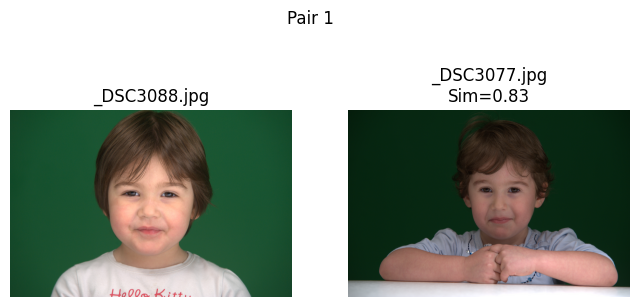

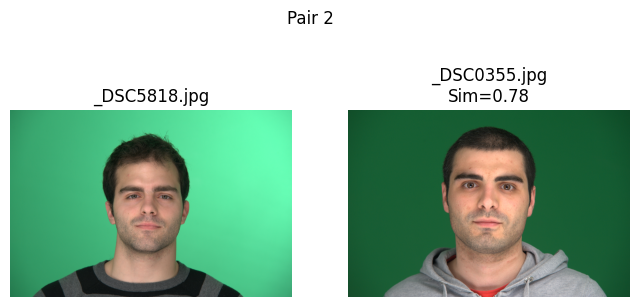

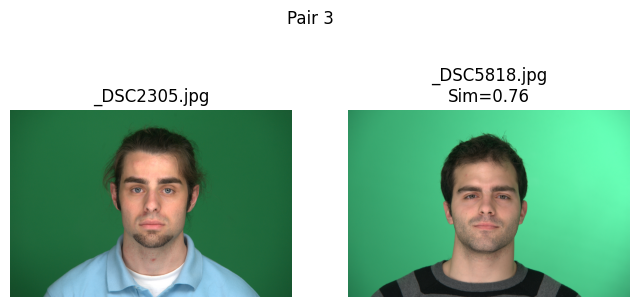

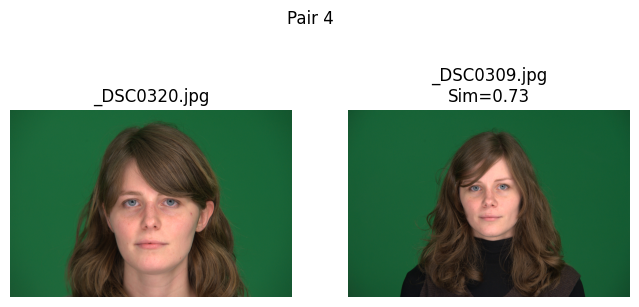

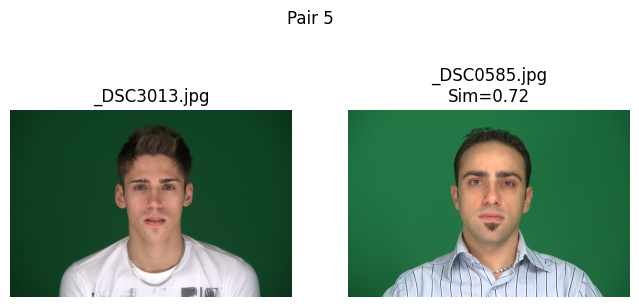

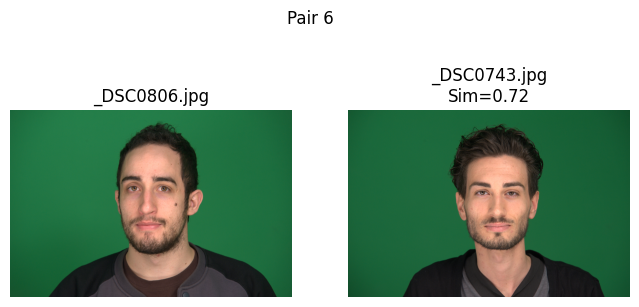

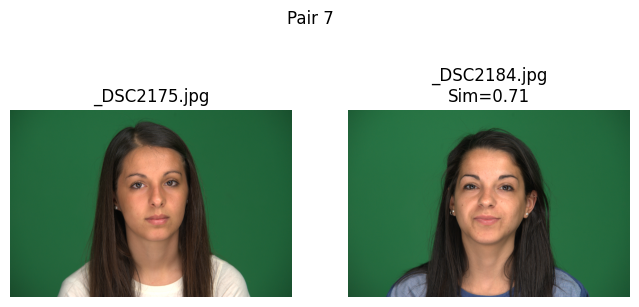

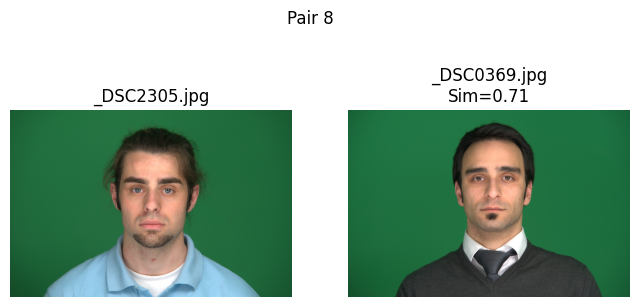

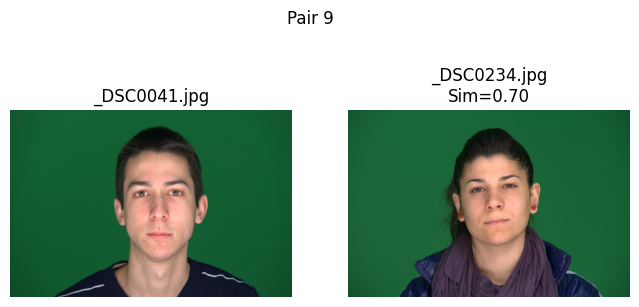

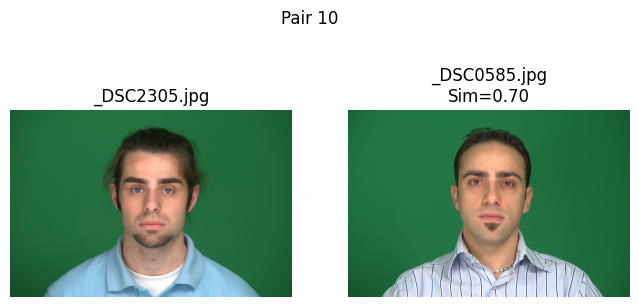

In [3]:
# Step 1: Imports
from deepface import DeepFace
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm
import itertools
import cv2
import os

# Step 2: Config
# ---------------------------------------------------
dataset_dir = "all_images"     # folder containing .jpg images
model_name = "Facenet"         # try "ArcFace" for even better results
top_n = 10                     # number of top similar pairs to display
# ---------------------------------------------------

# Step 3: Validate dataset
if not os.path.isdir(dataset_dir):
    raise FileNotFoundError(f"❌ Dataset folder '{dataset_dir}' not found!")

image_files = [f for f in os.listdir(dataset_dir) if f.lower().endswith(".jpg")]
if len(image_files) < 2:
    raise ValueError("⚠️ Need at least 2 images in the folder for pair comparison.")

print(f"📸 Found {len(image_files)} images in '{dataset_dir}'")

# Step 4: Compute embeddings for all images
embeddings = {}
for filename in tqdm(image_files, desc="Computing embeddings"):
    path = os.path.join(dataset_dir, filename)
    try:
        rep = DeepFace.represent(img_path=path, model_name=model_name)[0]["embedding"]
        embeddings[filename] = rep
    except Exception:
        print(f"⚠️ Skipping {filename} (face not detected)")
        continue

# Step 5: Compute pairwise cosine similarities
print("🔍 Finding best look-alike pairs...")
pairs = []
filenames = list(embeddings.keys())

for i, j in itertools.combinations(range(len(filenames)), 2):
    sim = cosine_similarity([embeddings[filenames[i]]], [embeddings[filenames[j]]])[0][0]
    pairs.append((filenames[i], filenames[j], sim))

# Step 6: Sort by similarity
pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
print(f"\n✅ Found {len(pairs)} valid pairs.")

# Step 7: Display top N similar pairs
print(f"\n🎯 Top {top_n} Look-Alike Pairs:")
for i in range(min(top_n, len(pairs))):
    print(f"{i+1}. {pairs[i][0]} ↔ {pairs[i][1]}  |  Similarity = {pairs[i][2]:.3f}")

# (Optional) Step 8: Visualize top pairs
import matplotlib.pyplot as plt

for i in range(min(top_n, len(pairs))):
    f1, f2, sim = pairs[i]
    img1 = cv2.cvtColor(cv2.imread(os.path.join(dataset_dir, f1)), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(os.path.join(dataset_dir, f2)), cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img1)
    axes[0].set_title(f1)
    axes[0].axis("off")

    axes[1].imshow(img2)
    axes[1].set_title(f2 + f"\nSim={sim:.2f}")
    axes[1].axis("off")

    plt.suptitle(f"Pair {i+1}")
    plt.show()
